<a href="https://colab.research.google.com/github/syadali/CNIT483/blob/main/483Lab_2Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 2: Logistic Regression**

The lab report will be due by **September 27, 2024**.


##**Problem 1**
In this problem, we will explore applying logistic regression to realize binary-class classification on the data in Data_Lab2_1.csv.

Requirments:
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training error, and (3) the obtained testing error.

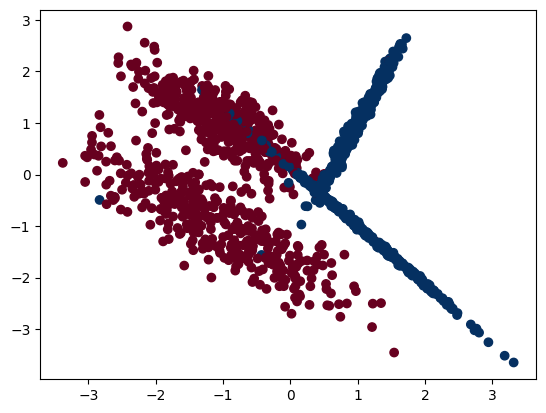

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization)      │ (None, 2)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 3 (16.00 B)

Epoch 1/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4468 - loss: 1.0938 - val_accuracy: 0.4467 - val_loss: 1.1288
Epoch 2/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4537 - loss: 1.0551 - val_accuracy: 0.4489 - val_loss: 1.0968
Epoch 3/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4601 - loss: 1.0219 - val_accuracy: 0.4511 - val_loss: 1.0653
Epoch 4/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4835 - loss: 0.9937 - val_accuracy: 0.4556 - val_loss: 1.0348
Epoch 5/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4467 - loss: 1.0018 - val_accuracy: 0.4600 - val_loss: 1.0039
Epoch 6/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5036 - loss: 0.8922 - val_accuracy: 0.4667 - val_loss: 0.9753
Epoch 7/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4895 - loss: 0.9222 - val_accuracy: 0.4733 - val_loss: 0.9462
Epoch 8/500
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4932 - loss: 0.8883 - val_accuracy: 0.4822 - 

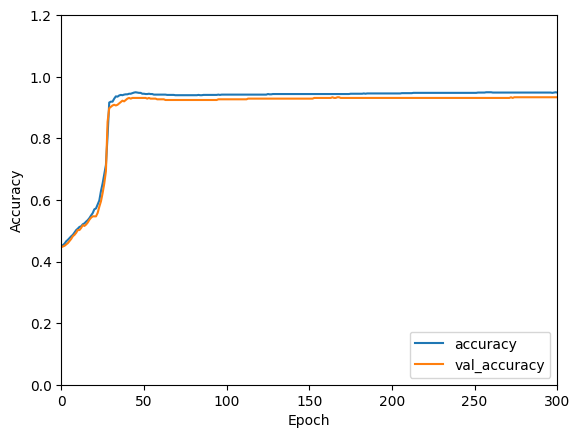

15/15 - 0s - 9ms/step - accuracy: 0.9289 - loss: 0.1655
Test Accuracy: 0.9288889169692993
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Training Error (MSE): 0.05523809523809524
Testing Error (MSE): 0.07111111111111111


In [5]:
# import python libs
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Obtain your data samples
data=pd.read_csv('/content/sample_data/Data_Lab2_1.csv')
x_0 = data['x_data_0'].values
x_1 = data['x_data_1'].values
x_data = np.stack((x_0, x_1), axis=1)
y_data = data['y_data'].values
plt.scatter(x_data[:,0], x_data[:,1], c=y_data, cmap="RdBu")
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

# Design the logistic regression model
model = models.Sequential()
model.add(layers.Normalization(input_shape = [2,], axis = None))

# do not apply any regularizer
model.add(layers.Dense(1, activation = 'sigmoid'))

# apply regularizer
# model.add(layers.Dense(1, activation = 'sigmoid', activity_regularizer=tf.keras.regularizers.L2(0.01)))

model.summary()

# Compile and training the fully-connected NN model
adam = optimizers.Adam(learning_rate=0.2)

model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=500,
                    validation_data=(x_test, y_test))

# Evaluate the fully connected neural network Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 300])
plt.ylim([0, 1.2])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

# Predictions
y_train_p = (model.predict(x_train) > 0.5)
y_test_p = (model.predict(x_test) > 0.5)

# Calculate the training and testing errors using mean squared error (MSE)
train_error = mean_squared_error(y_train, y_train_p)
test_error = mean_squared_error(y_test, y_test_p)

print(f"Training Error (MSE): {train_error}")
print(f"Testing Error (MSE): {test_error}")

##**Problem 2**
In this problem, we will explore to apply logistic regression to solve a real-world problem of identifying the species of iris plants. The dataset Data_Lab2_2 is a modified dataset from the original Iris dataset. Your task is to determine whether a given iris plant belongs to the Setosa species (label 0) or the Versicolor species (label 1) based on four features: sepal length, sepal width, petal length, and petal width.    

Requirments:
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training error, and (3) the obtained testing error.

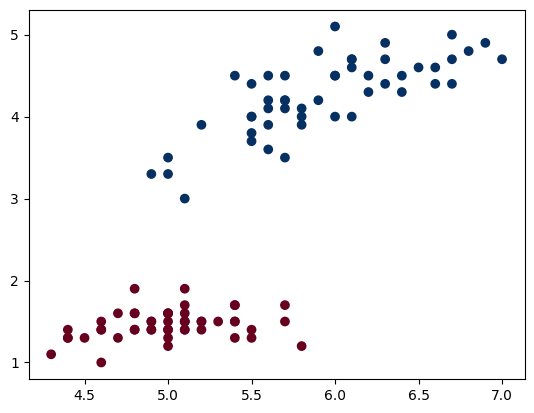

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_7 (Normalization)      │ (None, 4)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 5 (20.00 B)

 Non-trainable params: 3 (16.00 B)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 0.4740 - loss: 1.7932 - val_accuracy: 0.5667 - val_loss: 1.5312
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4584 - loss: 1.8016 - val_accuracy: 0.5667 - val_loss: 1.5172
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5092 - loss: 1.6519 - val_accuracy: 0.5667 - val_loss: 1.5038
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4779 - loss: 1.7264 - val_accuracy: 0.5667 - val_loss: 1.4902
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4506 - loss: 1.7626 - val_accuracy: 0.5667 - val_loss: 1.4769
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4818 - loss: 1.6740 - val_accuracy: 0.5667 - val_loss: 1.4642
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4779 - loss: 1.6498 - val_accuracy: 0.5667 - val_loss: 1.4516
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4779 - loss: 1.6523 - val_accuracy: 0.5667 - val_loss

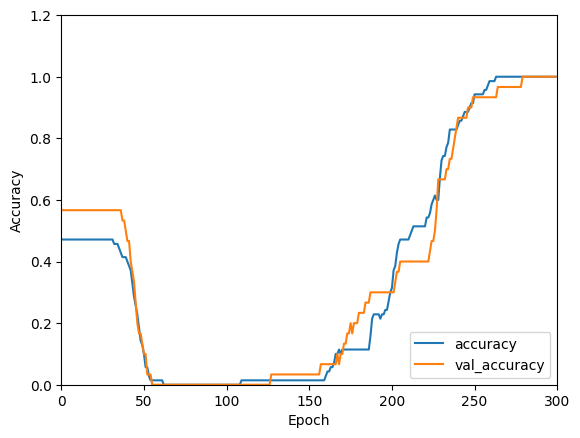

1/1 - 0s - 21ms/step - accuracy: 1.0000 - loss: 0.6420


Test Accuracy: 1.0
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Training Error (MSE): 0.0
Testing Error (MSE): 0.0


In [8]:
# import python libs
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Obtain your data samples
data=pd.read_csv('/content/sample_data/Data_Lab2_2.csv')
x_data = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values
y_data = data['species'].values
plt.scatter(x_data[:, 0], x_data[:, 2], c=y_data, cmap="RdBu")
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

# Design the logistic regression model
model = models.Sequential()
model.add(layers.Normalization(input_shape = [4,], axis = None))

# do not apply any regularizer
# model.add(layers.Dense(1, activation = 'sigmoid'))

# apply regularizer
model.add(layers.Dense(1, activation = 'sigmoid', activity_regularizer=tf.keras.regularizers.L2(0.01)))

model.summary()

# Compile and training the fully-connected NN model
adam = optimizers.Adam(learning_rate=0.2)

model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=300,
                    validation_data=(x_test, y_test))

# Evaluate the fully connected neural network Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 300])
plt.ylim([0, 1.2])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

# Predictions
y_train_p = (model.predict(x_train) > 0.5)
y_test_p = (model.predict(x_test) > 0.5)

# Calculate the training and testing errors using mean squared error (MSE)
train_error = mean_squared_error(y_train, y_train_p)
test_error = mean_squared_error(y_test, y_test_p)

print(f"Training Error (MSE): {train_error}")
print(f"Testing Error (MSE): {test_error}")


##**Problem 3**
In this problem, we will explore applying logistic regression to realize binary-class classification on the data in Data_Lab2_3.csv.

Requirments:
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training error, and (3) the obtained testing error.

(Comment: It is fine if you cannot obtain high accuracy.)

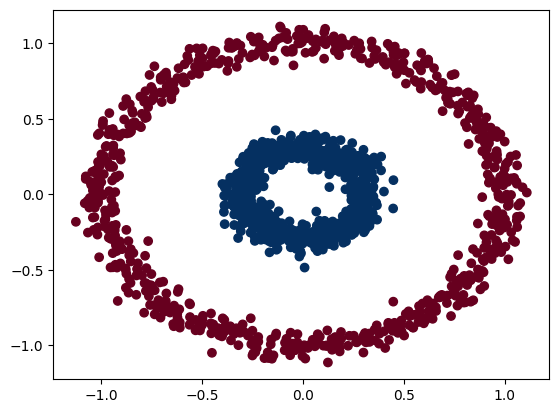

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_6 (Normalization)      │ (None, 2)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 3 (16.00 B)

Epoch 1/300
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4871 - loss: 0.7473 - val_accuracy: 0.5178 - val_loss: 0.7234
Epoch 2/300
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4730 - loss: 0.7568 - val_accuracy: 0.5156 - val_loss: 0.7213
Epoch 3/300
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4815 - loss: 0.7484 - val_accuracy: 0.5156 - val_loss: 0.7193
Epoch 4/300
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4889 - loss: 0.7257 - val_accuracy: 0.5156 - val_loss: 0.7175
Epoch 5/300
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4921 - loss: 0.7360 - val_accuracy: 0.5156 - val_loss: 0.7158
Epoch 6/300
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4589 - loss: 0.7480 - val_accuracy: 0.5156 - val_loss: 0.7140
Epoch 7/300
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4624 - loss: 0.7362 - val_accuracy: 0.5156 - val_loss: 0.7125
Epoch 8/300
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4843 - loss: 0.7326 - val_accuracy: 0.5156 - 

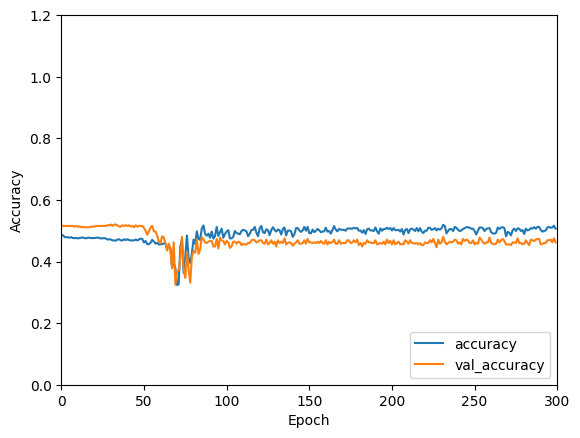

15/15 - 0s - 2ms/step - accuracy: 0.4622 - loss: 0.6948
Test Accuracy: 0.46222221851348877
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Training Error (MSE): 0.49333333333333335
Testing Error (MSE): 0.5377777777777778


In [9]:
# import python libs
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Obtain your data samples
data=pd.read_csv('/content/sample_data/Data_Lab2_3.csv')
x_0 = data['x_data_0'].values
x_1 = data['x_data_1'].values
x_data = np.stack((x_0, x_1), axis=1)
y_data = data['y_data'].values
plt.scatter(x_data[:,0], x_data[:,1], c=y_data, cmap="RdBu")
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

# Design the logistic regression model
model = models.Sequential()
model.add(layers.Normalization(input_shape = [2,], axis = None))

# do not apply any regularizer
model.add(layers.Dense(1, activation = 'sigmoid'))

# apply regularizer
# model.add(layers.Dense(1, activation = 'sigmoid', activity_regularizer=tf.keras.regularizers.L2(0.01)))

model.summary()

# Compile and training the fully-connected NN model
adam = optimizers.Adam(learning_rate=0.3)

model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=300,
                    validation_data=(x_test, y_test))

# Evaluate the fully connected neural network Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 300])
plt.ylim([0, 1.2])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

# Predictions
y_train_p = (model.predict(x_train) > 0.5)
y_test_p = (model.predict(x_test) > 0.5)

# Calculate the training and testing errors using mean squared error (MSE)
train_error = mean_squared_error(y_train, y_train_p)
test_error = mean_squared_error(y_test, y_test_p)

print(f"Training Error (MSE): {train_error}")
print(f"Testing Error (MSE): {test_error}")

##**Problem 4**
In this problem, we will explore applying logistic regression to realize binary-class classification on the data in Data_Lab2_4.csv.

Requirments:
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training error, and (3) the obtained testing error.

(Comment: It is fine if you cannot obtain high accuracy.)

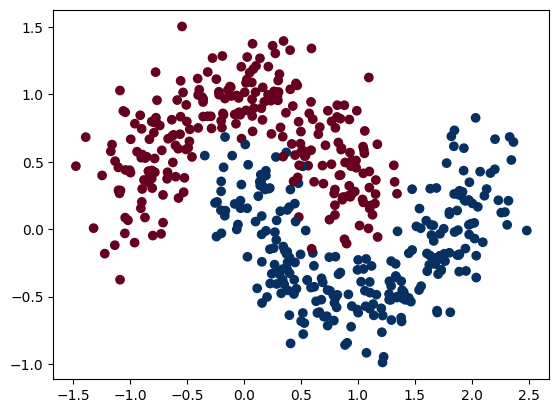

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_7 (Normalization)      │ (None, 2)                   │               3 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 3 (16.00 B)

Epoch 1/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.5850 - loss: 0.7271 - val_accuracy: 0.5667 - val_loss: 0.7364
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5772 - loss: 0.7535 - val_accuracy: 0.5733 - val_loss: 0.7316
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5744 - loss: 0.7486 - val_accuracy: 0.5733 - val_loss: 0.7270
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5468 - loss: 0.7693 - val_accuracy: 0.5733 - val_loss: 0.7223
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5423 - loss: 0.7728 - val_accuracy: 0.5800 - val_loss: 0.7177
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5714 - loss: 0.7441 - val_accuracy: 0.5800 - val_loss: 0.7133
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5490 - loss: 0.7636 - val_accuracy: 0.5800 - val_loss: 0.7088
Epoch 8/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5491 - loss: 0.7534 - val_accuracy: 0.5867 - 

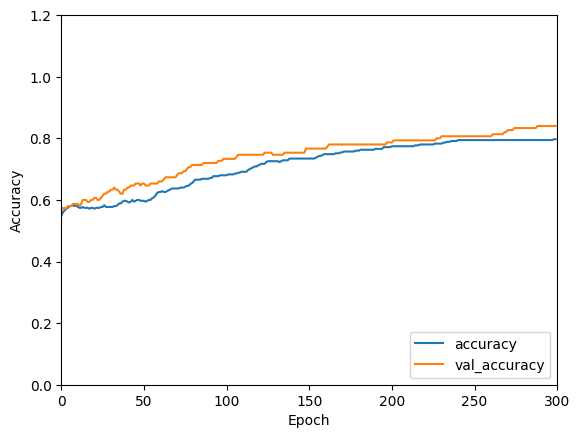

5/5 - 0s - 7ms/step - accuracy: 0.8400 - loss: 0.3223
Test Accuracy: 0.8399999737739563
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Training Error (MSE): 0.20285714285714285
Testing Error (MSE): 0.16


In [10]:
# import python libs
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Obtain your data samples
data=pd.read_csv('/content/sample_data/Data_Lab2_4.csv')
x_0 = data['x_data_0'].values
x_1 = data['x_data_1'].values
x_data = np.stack((x_0, x_1), axis=1)
y_data = data['y_data'].values
plt.scatter(x_data[:,0], x_data[:,1], c=y_data, cmap="RdBu")
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

# Design the logistic regression model
model = models.Sequential()
model.add(layers.Normalization(input_shape = [2,], axis = None))

# do not apply any regularizer
model.add(layers.Dense(1, activation = 'sigmoid'))

# apply regularizer
# model.add(layers.Dense(1, activation = 'sigmoid', activity_regularizer=tf.keras.regularizers.L2(0.01)))

model.summary()

# Compile and training the fully-connected NN model
adam = optimizers.Adam(learning_rate=0.3)

model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=300,
                    validation_data=(x_test, y_test))

# Evaluate the fully connected neural network Model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 300])
plt.ylim([0, 1.2])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")

# Predictions
y_train_p = (model.predict(x_train) > 0.5)
y_test_p = (model.predict(x_test) > 0.5)

# Calculate the training and testing errors using mean squared error (MSE)
train_error = mean_squared_error(y_train, y_train_p)
test_error = mean_squared_error(y_test, y_test_p)

print(f"Training Error (MSE): {train_error}")
print(f"Testing Error (MSE): {test_error}")

##**Bonus Question (This question is for bonus credit and not required to be completed)**
You may find that the logisitc regression solution does not perform very well in the binary-class classification problems in Problems 3 and 4. Please investigate and explain the reasons for this lower performance based on your understanding. You can provide your answers using words, plots, or equations.

In [ ]:
'''

Because it is unsuccessful for non-linear data and expects a linear decision boundary, Problems 3 and 4 don't perform that well.
A linear model may not be able to adequately handle the complexity present in the data in Problem 3.
Comparably, features in Problem 4 can call for a more adaptable model in order to represent complex relationships.
The model's assumptions and the way the data is structured don't match, which results in low classification accuracy and poor performance.

'''